<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 4: Classification and Logistic Regression

### ECE6210 Machine Intelligence

__Armin Mehrabian__<br>The George Washington Universiry

# Part 1: Classification

So far, every supervised learning algorithm that we've seen has been an instance of regression.

We will next look at classification. First, let's define what classification is.

# Review: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Review: Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 


1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.


2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification

An important special case of classification is when the number of classes $K=2$.

In this case, we have an instance of a *binary classification* problem.

# Classification Dataset: Iris Flowers

To demonstrate classification algorithms, we are going to use the Iris flower dataset. 

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

## Three flavors of Iris flowers
<center><img src="img/iris-flowers.png"/></center>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let's visualize this dataset. We first import `matplotlib` and other plotting tools.

Here is a visualization of this dataset in 3D. Note that we are using the first 3 features (out of 4) in this dateset.

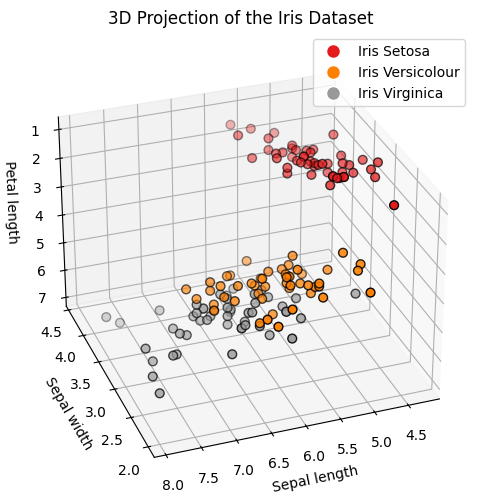

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# Reduce the dataset to its first three features
X_reduced = iris_X[:, :3]

# Let's visualize this dataset
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

ax.set_title("3D Projection of the Iris Dataset")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")

# Scatter plot
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris_y,
                     cmap=plt.cm.Set1, edgecolor='k', s=40)

# Creating a custom legend
legend_labels = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
                  for i in range(3)]

plt.legend(handles=legend_handles, labels=legend_labels)

plt.show()


# Understanding Classification

How is clasification different from regression?
* In regression, we try to fit a curve through the set of targets $y^{(i)}$.

* In classification, classes define a partition of the feature space, and our goal is to find the boundaries that separate these regions.

* Outputs of classification models often have a simple probabilistic interpretation: they are probabilities that a data point belongs to a given class.

Let's look at our Iris dataset again. Note that we are now only using the first 2 attributes in this dateset.

In [8]:
plt.rcParams['figure.figsize'] = [12, 4]
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

Let's train a classification algorithm on this data.

Below, we see the regions predicted to be associated with the blue and non-blue classes and the line between them in the decision boundary.

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
# rename class two to class one
Y = iris_y.copy()
logreg.fit(X, Y) 

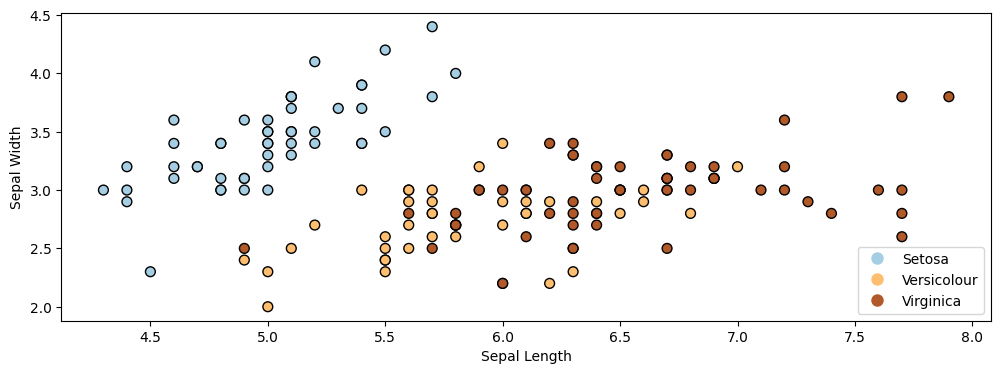

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# Set figure size
plt.rcParams['figure.figsize'] = [12, 4]

# Scatter plot
p1 = plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y,
                 edgecolor='k', s=50, cmap=plt.cm.Paired)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Creating a custom legend
legend_labels = ['Setosa', 'Versicolour', 'Virginica']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=p1.cmap(p1.norm(i)), markersize=10) 
                  for i in range(3)]

plt.legend(handles=legend_handles, labels=legend_labels, loc='lower right')

plt.show()


<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 2: Nearest Neighbors

Previously, we have seen what defines a classification problem. Let's now look at our first classification algorithm.

# A Simple Classification Algorithm: Nearest Neighbors

Suppose we are given a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$. At inference time, we receive a query point $x'$ and we want to predict its label $y'$.

A really simple but suprisingly effective way of returning $y'$ is the *nearest neighbors* approach.
* Given a query datapoint $x'$, find the training example $(x, y)$ in $\mathcal{D}$ that's closest to $x'$, in the sense that $x$ is "nearest" to $x'$
* Return $y$, the label of the "nearest neighbor" $x$.

In the example below on the Iris dataset, the red cross denotes the query $x'$. The closest class to it is "Virginica". (We're only using the first two features in the dataset for simplicity.)

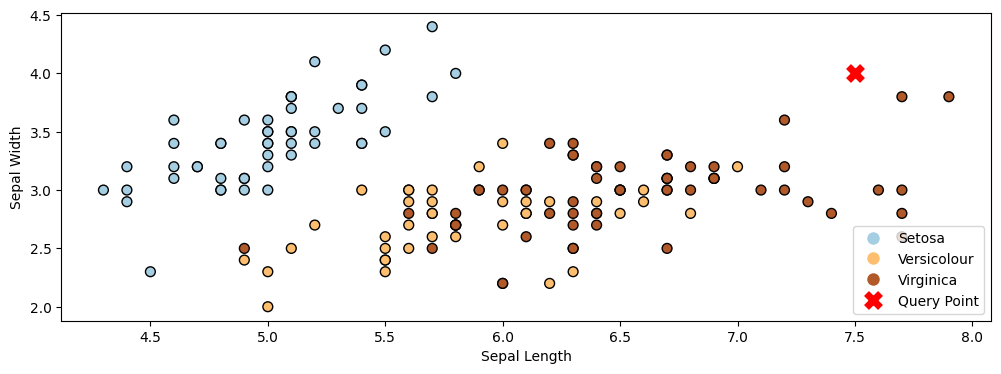

In [11]:
plt.rcParams['figure.figsize'] = [12, 4]

# Plot also the training points
p1 = plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y,
                 edgecolor='k', s=50, cmap=plt.cm.Paired)
p2, = plt.plot([7.5], [4], 'rx', ms=10, mew=5, label='Query Point')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Custom legend combining training data and query point
legend_labels = ['Setosa', 'Versicolour', 'Virginica']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=p1.cmap(p1.norm(i)), markersize=10) 
                  for i in range(3)]

legend_handles.append(p2)

plt.legend(handles=legend_handles, labels=legend_labels + ['Query Point'], loc='lower right')

plt.show()


# Choosing a Distance Function

How do we select the point $x$ that is the closest to the query point $x'$? There are many options:

* The Euclidean distance $|| x - x' ||_2 = \sqrt{\sum_{j=1}^d |x_j - x'_j|^2)}$ is a popular choice.

* The Minkowski distance $|| x - x' ||_p = (\sum_{j=1}^d |x_j - x'_j|^p)^{1/p}$ generalizes the Euclidean, L1 and other distances.

* Discrete-valued inputs can be examined via the Hamming distance $|\{j : x_j \neq x_j'\}|$ and other distances.

Let's apply Nearest Neighbors to the above dataset using the Euclidean distance (or equiavalently, Minkowski with $p=2$)

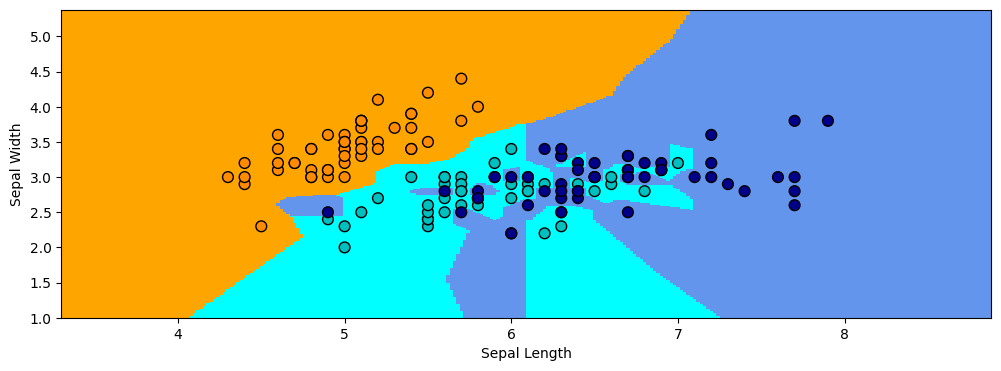

In [13]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Train a Nearest Neighbors Model
clf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
clf.fit(iris_X[:, :2], iris_y)  # Use array slicing instead of .iloc

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=cmap_bold,
            edgecolor='k', s=60)  # Use array slicing instead of .iloc
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


In the above example, the regions of the 2D space that are assigned to each class are highly irregular. In areas where the two classes overlap, the decision of the boundary flips between the classes, depending on which point is closest to it.

# K-Nearest Neighbors

Intuitively, we expect the true decision boundary to be smooth. Therefore, we average $K$ nearest neighbors at a query point.

* Given a query datapoint $x'$, find the $K$ training examples $\mathcal{N} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(K)}, y^{(K)})\} \subseteq D$ that are closest to $x'$.
* Return $y_\mathcal{N}$, the consensus label of the neighborhood $\mathcal{N}$.

The consesus $y_\mathcal{N}$ can be determined by voting, weighted average, etc.

Let's look at Nearest Neighbors with a neighborhood of 30. The decision boundary is much smoother than before.

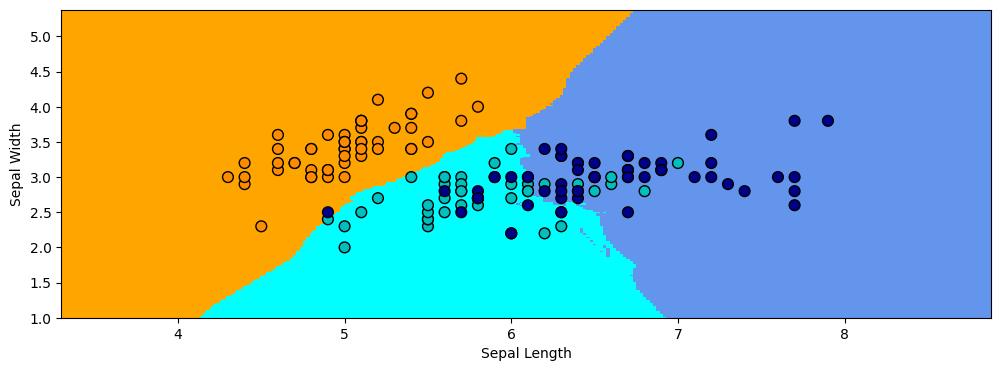

In [15]:
# Train a Nearest Neighbors Model
clf = neighbors.KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
clf.fit(iris_X[:, :2], iris_y)  # Use array slicing instead of .iloc

# Predict for the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=cmap_bold,  # Use array slicing instead of .iloc
            edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


# Algorithm: K-Nearest Neighbors

* __Type__: Supervised learning (regression and classification)
* __Model family__: Consensus over $K$ training instances.
* __Objective function__: Euclidean, Minkowski, Hamming, etc.
* __Optimizer__: Non at training. Nearest neighbor search at inference using specialized search algorithms.
* __Probabilistic interpretation__: Directly approximating the density $P_\text{data}(y|x)$.

# Pros and Cons of KNN

Pros:
* Can approximate any data distribution arbtrarily well.

Cons:
* Need to store entire dataset to make queries, which is computationally prohibitive.
* Number of data needed scale exponentially with dimension ("curse of dimensionality").

<left><img width=25% src="img/gw_monogram_2c.png"></left>


# Part 3: Logistic Regression

Next, we are going to see our first classification algorithm: logistic regression.

# Review: Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification and the Iris Dataset

We will to start by looking at binary (two-class) classification. 

To keep things simple, we will use the Iris dataset. We will attempt to distinguish class 0 (Iris Setosa) from the other two classes.

We only use the first two features in the dataset. Our task is to tell apart Setosa flowers from non-Setosa flowers.

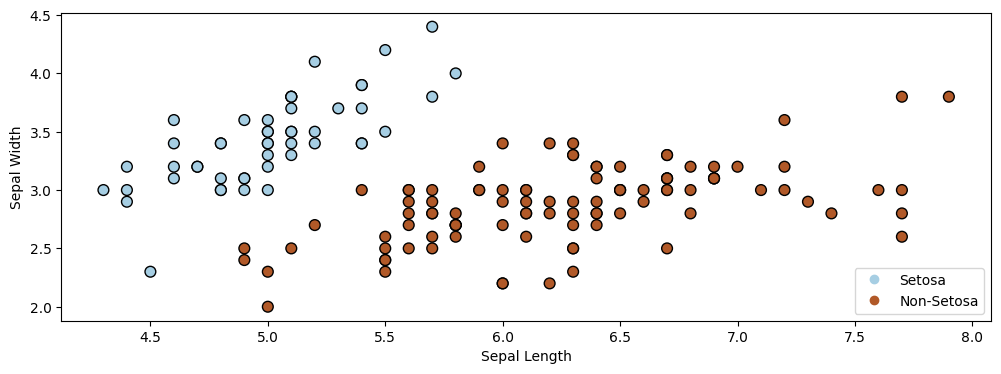

In [17]:
# Rename class two to class one
iris_y2 = iris_y.copy()
iris_y2[iris_y2 == 2] = 1

# Plot also the training points
p1 = plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y2,  # Use array slicing instead of .iloc
                 edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Create a custom legend
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')

plt.show()


# Review: Least Squares

Recall that the linear regression algorithm fits a linear model of the form
$$ f(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

It minimizes the mean squared error (MSE)
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
on a dataset $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We could use least squares to solve our classification problem, setting $\mathcal{Y} = \{0, 1\}$.

In [19]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Fit the data.
X = iris_X[:, :2]  # Use array slicing instead of .to_numpy() since iris_X is already a NumPy array
Y = iris_y2
linreg.fit(X, Y)


LinearRegression()

Ordinary least squares returns a decision boundary that is not unreasonable.

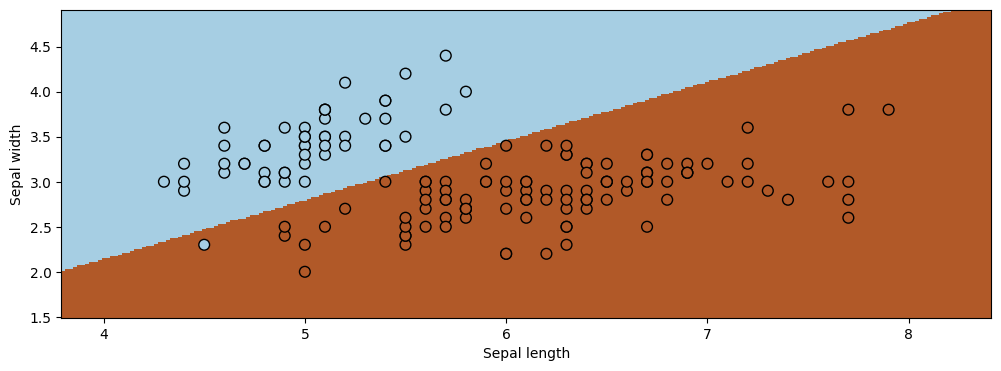

In [20]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = linreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z>0.5] = 1
Z[Z<0.5] = 0

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=60)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

However, applying ordinary least squares is problematic for a few reasons.
* There is nothing to prevent outputs larger than one or smaller than zero, which is conceptually wrong
* We also don't have optimal performance: at least one point is misclassified, and others are too close to the decision boundary.

# The Logistic Function

To address the fact that the output of linear regression is not in $[0,1]$, we will instead attempt to *squeeze* it into that range using
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
This is known as the *sigmoid* or *logistic* function.

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" points from the real line into $[0,1]$.

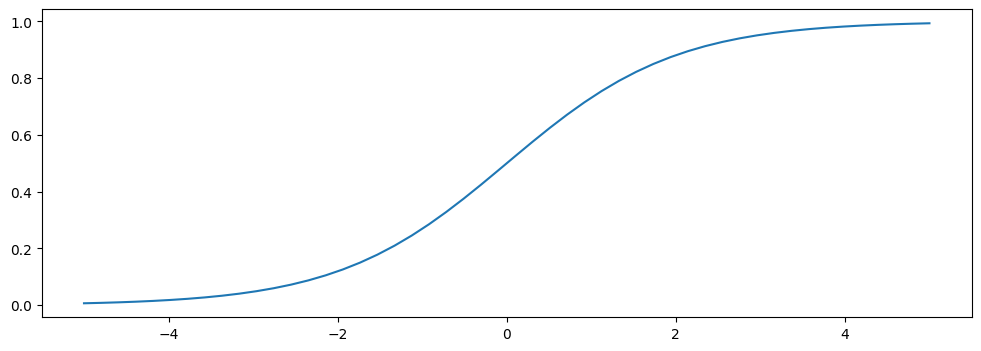

In [21]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-5, 5)
plt.plot(z, sigmoid(z))

# The Logistic Function: Properties

The sigmoid function is defined as
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
A few observations:

* The function tends to 1 as $z \to \infty$ and tends to 0 as $z \to -\infty$.

* Thus, models of the form $\sigma(\theta^\top x)$ output values between 0 and 1, which is suitable for binary classification.

* It is easy to show that the derivative of $\sigma(z)$ has a simple form:
$\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z)).$

# Logistic Regression: Model Class

Logistic regression is a classification algorithm which uses a model $f_\theta$ of the form
$$ f_\theta(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where 
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is the *sigmoid* or *logistic* function.

Note that logistic regression is actually a binary __classification__ algorithm.

The term *regression* is an unfortunate historical misnomer.

Let's implement a logistic regression model in `numpy`.

In [22]:
def f(X, theta):
    """The sigmoid model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return sigmoid(X.dot(theta))

# Probabilistic Interpretations

The logistic model can be interpreted to output a probability, and defines a conditional probability distribution as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

Recall that a probability over $y\in \{0,1\}$ is called Bernoulli.

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 3: Maximum Likelihood

In order to train a logistic regression model, we need to define an objective.

We derive this objective using the principle of maximum likelihood.

# Recall: Supervised Learning Models

A supervised learning model is a function
$$ f_\theta : \underbrace{\mathcal{X}}_\text{input} \to \underbrace{\mathcal{Y}}_\text{output} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Models have *parameters* $\theta \in \Theta$ living in a set $\Theta$.

# Probabilistic Supervised Learning Models

A probabilistic supervised learning model has the form

$$ f_\theta : \underbrace{\mathcal{X}}_\text{input} \to \underbrace{(\mathcal{Y} \to [0,1])}_\text{probability P(y|x) over $\mathcal{Y}$} $$ 

and maps inputs $x \in \mathcal{X}$ to a *conditional probability* $P(y|x) : \mathcal{Y} \to [0,1]$ over targets $y \in \mathcal{Y}$, where the conditioning is on $x$.

The model also has *parameters* $\theta \in \Theta$ living in a set $\Theta$.

For example, our logistic model $f_\theta$ defines ("parameterizes") a probability distribution $P_\theta(y|x)$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

For each $x$, $P_\theta(y|x)$ is a valid probability over $y \in \{0,1\}$.

We usually use the following notation to denote probabilistic models:

\begin{align*}
P_\theta(y|x) : \mathcal{X} \to \underbrace{(\mathcal{Y} \to [0,1])}_\text{probability $P(y|x)$ over $\mathcal{Y}$}.
\end{align*}

You can view such models as directly parameterizing a conditional probability $P_\theta(y|x)$ using parameters $\theta$:
* Given an $x$, we have a formula for $P_\theta(y|x)$ as a function of $x$ and $\theta$.
* The formula assigns higher probabilities ("scores") to more likely $y$.
* These scores sum to 1 over all $y$, hence they're valid probabilities.

# Probability Refresher

**Joint Probability:** The probability of two or more events happening simultaneously. $P(A \cap B)$ or  $P(A, B)$

**Marginal Probability:** Marginal probability $P(A)$ or $P(B)$ is the probability of a single event regardless of the outcome of another;
* If the random variable A is independent, then its marginal probability is the probability of the event directly
* Otherwise, if the variable A is dependent upon other variables, then the marginal probability is the probability of the event summed over all outcomes for the dependent variables, called the sum rule


**Conditional Probability:** The probability of one (or more) event given the occurrence of another event, e.g., $ P(A|B)$ or $P(B|A)$ 


# Probability Refresher

The **joint probability** can be calculated using the conditional probability: 

$$P(A \cap B) = P(A,B) = P(A|B) \times P(B) = P(B|A) \times P(A)$$


Similarly:
$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B|A) \times P(A)}{P(B)}$$

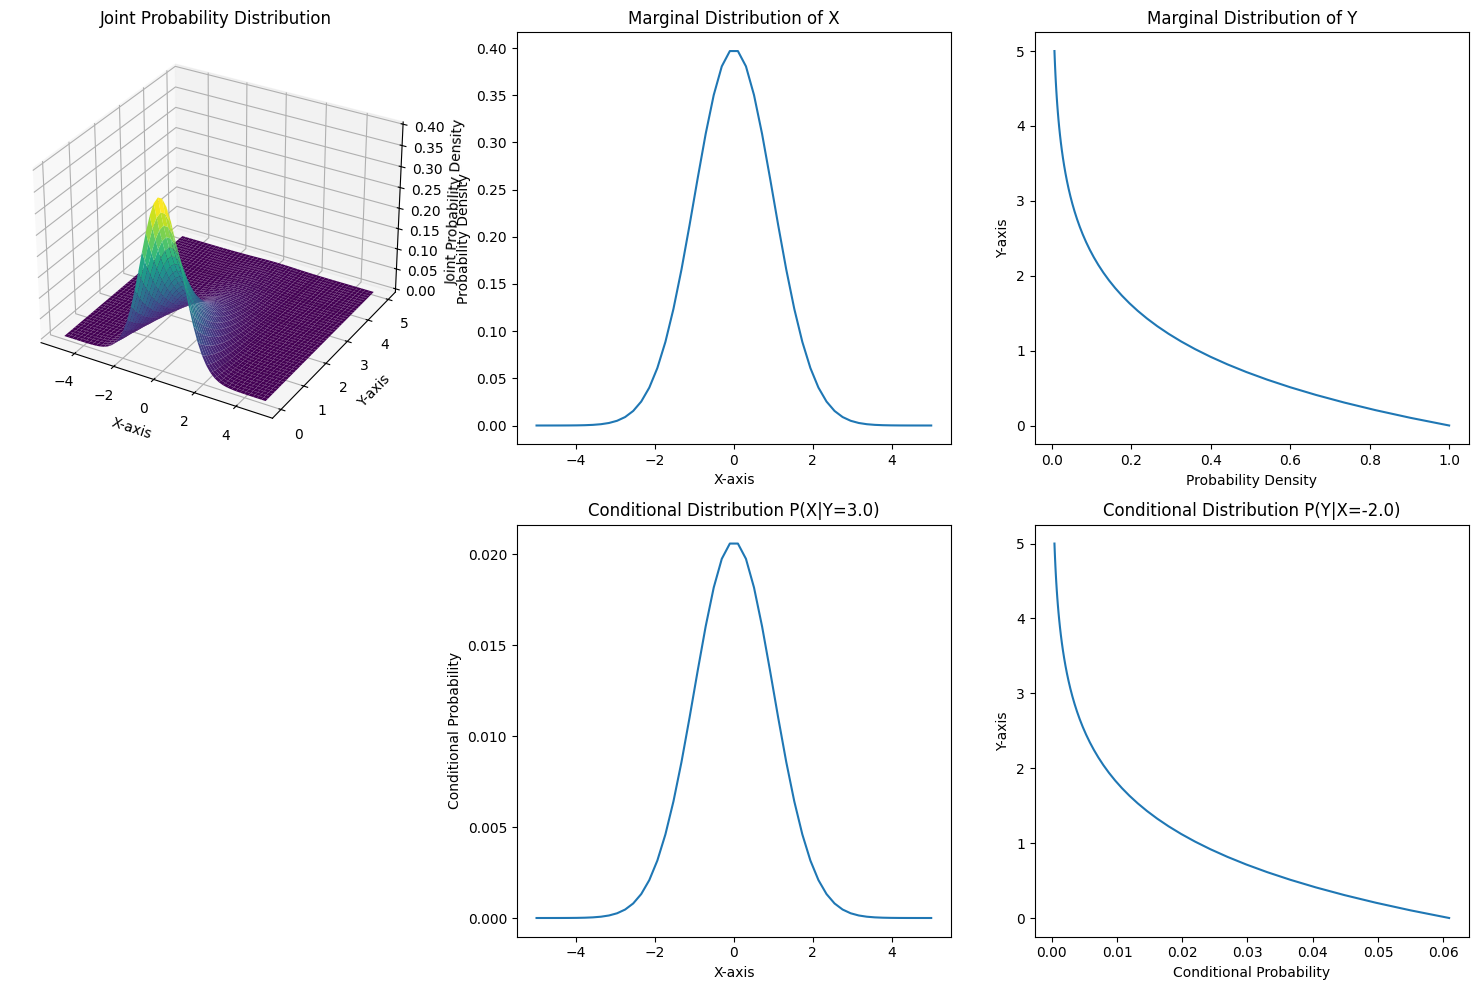

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, expon

# Create data
x_values = np.linspace(-5, 5, 50)
y_values = np.linspace(0, 5, 50)

meshgrid_x, meshgrid_y = np.meshgrid(x_values, y_values)

# Create Z using a normal distribution for meshgrid_x and an exponential distribution for meshgrid_y
Z = norm.pdf(meshgrid_x, 0, 1) * expon.pdf(meshgrid_y, 0, 1)  # normal distribution for meshgrid_x, exponential for meshgrid_y

# Create main 3D plot
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(meshgrid_x, meshgrid_y, Z, cmap='viridis')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Joint Probability Density')
ax1.set_title('Joint Probability Distribution')

# Create subplot for the marginal distribution of x_values
ax2 = fig.add_subplot(232)
ax2.plot(x_values, norm.pdf(x_values, 0, 1))
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Probability Density')
ax2.set_title('Marginal Distribution of X')

# Create subplot for the marginal distribution of y_values
ax3 = fig.add_subplot(233)
ax3.plot(expon.pdf(y_values, 0, 1), y_values)
ax3.set_xlabel('Probability Density')
ax3.set_ylabel('Y-axis')
ax3.set_title('Marginal Distribution of Y')

# Create subplot for conditional probability P(X|Y=y0)
y0 = 3.0  # example fixed value for Y
ax4 = fig.add_subplot(235)
ax4.plot(x_values, Z[np.argmin(np.abs(y_values - y0)), :])
ax4.set_xlabel('X-axis')
ax4.set_ylabel('Conditional Probability')
ax4.set_title(f'Conditional Distribution P(X|Y={y0})')

# Create subplot for conditional probability P(Y|X=x0)
x0 = -2.0  # example fixed value for X
ax5 = fig.add_subplot(236)
ax5.plot(Z[:, np.argmin(np.abs(x_values - x0))], y_values)
ax5.set_xlabel('Conditional Probability')
ax5.set_ylabel('Y-axis')
ax5.set_title(f'Conditional Distribution P(Y|X={x0})')

plt.tight_layout()
plt.show()


# Conditional Maximum Likelihood

Conditional Likelihood of $y$ given $x$: 
$$\ell_{\theta}(y|x) = P_{\theta}(y^{(1)}, y^{(2)}, \ldots, y^{(n)} | x^{(1)}, x^{(2)}, \ldots, x^{(n)})$$



Assuming the observations are independent and identically distributed (iid):
$$\ell_{\theta}(y|x) = \prod_{i=1}^{n} P_{\theta}(y^{(i)} | x^{(i)}) = P_{\theta}(y^{(1)} | x^{(1)})\times P_{\theta}(y^{(2)} | x^{(2)})\times ... \times P_{\theta}(y^{(n)} | x^{(n)})$$
* We need to find the $\theta$ that maximizes this likelihood
* Since $log$ is a monotonically increasing function, if we take the log of the likehood function, we can convert Products to Summations, which is easier to work with


$$\log(\ell_{\theta}(y|x)) = \log(\prod_{i=1}^{n} P_{\theta}(y^{(i)} | x^{(i)})) = \log(P_{\theta}(y^{(1)} | x^{(1)})\times P_{\theta}(y^{(2)} | x^{(2)})\times ... \times P_{\theta}(y^{(n)} | x^{(n)})) = $$
$$\sum_{i=1}^n \log P_\theta(y^{(i)} | {x}^{(i)})$$

# Conditional Maximum Likelihood (Will cover this more thoroughly in future lectures)

We can train any model that defines a probability distribution $P_\theta(y|x)$ by optimizing
the *conditional maximum likelihood* objective
$$
\max_\theta \ell(\theta) = \max_{\theta}\sum_{i=1}^n \log P_\theta(y^{(i)} | {x}^{(i)}).
$$
defined over a dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

This asks that for each input $x^{(i)}$ in the dataset $\mathcal{D}$, $P_\theta$ should assign a high probability to the correct target $y^{(i)}$.

Why is maximum likelihood a good objective? 

* Given $x^{(i)}$, our model defines a distribution $P_\theta(y|x^{(i)})$ over $y$
* We want to choose the weights such that the true label $y^{(i)}$ has the highest possible probability under $P_\theta(y|x^{(i)})$ at each known $x^{(i)}$

Maximuzing log-likelihood asks the model $f_\theta(x) = \sigma(\theta^\top x)$: 
* To output values close to one when the true label is one 
* And close to zero when the true label is zero

# Example: Flipping a Random Coin

$
\newcommand{\cm}{\mathcal{M}}
$
Consider a simple example in which we repeatedly toss a BIASED coin and record the outcomes.

* There are two possible outcomes: heads ($H$) and tails ($T$). A training dataset consists of tosses of the biased coin, e.g., $\mathcal{D}=\{H,H,T,H,T\}$ 

* Assumption: true probability distribution is $P_{\textrm{data}}(y)$, $y \in \{H,T\}$ 

* Our task is to determine the probability $\theta$ of seeing heads. 

# Example: Flipping a Random Coin

How should we choose $\theta$ if 3 out of 5 tosses are heads? Let's apply maximum likelihood learning.

* Our dataset is $\mathcal{D}=\{y^{(1)},y^{(2)},y^{(3)},y^{(4)},y^{(5)}\}=\{H,H,T,H,T\}$ 
* Our model is $P_\theta(y)=\theta$ if $y=H$ and $P_\theta(y)=1-\theta$ if $y=T$, and there is a single parameter $\theta \in [0,1]$
* The likelihood of the data is $L(\theta) = \prod_{i=1}^n P_\theta(y^{(i)})=\theta \cdot \theta \cdot (1-\theta) \cdot \theta \cdot (1-\theta)$.

We optimize for $\theta$ which makes $\mathcal{D}$ most likely. What is the solution in this case?

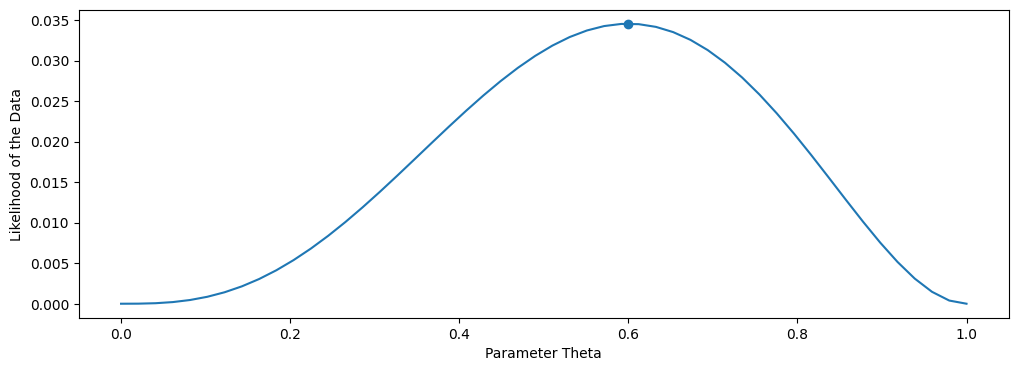

In [24]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# our dataset is {H, H, T, H, T}; if theta = P(x=H), we get:
coin_likelihood = lambda theta: theta*theta*(1-theta)*theta*(1-theta)

theta_vals = np.linspace(0,1)
plt.ylabel('Likelihood of the Data')
plt.xlabel('Parameter Theta')
plt.scatter([0.6], [coin_likelihood(0.6)])
plt.plot(theta_vals, coin_likelihood(theta_vals))

The likelihood $L(\theta)$ is maximized by $\theta=0.6$, which is also what we expect intuitively since 3/5 tosses are heads.

# Example: Flipping a Random Coin

Our log-likelihood function is
\begin{eqnarray}
\nonumber
L(\theta) &=& \theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}\\
\nonumber
\log L(\theta) &=& \log(\theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}) \\
\nonumber
&=& \#\,\text{heads} \cdot \log(\theta) + \#\,\text{tails} \cdot \log(1-\theta)
\end{eqnarray}
The maximum likelihood estimate is the $\theta^* \in [0,1]$ such that $\log L(\theta^*)$ is maximized.

Differentiating the log-likelihood function with respect to $\theta$ and setting the derivative to zero, we obtain
$$\theta^*= \frac{\#\,\text{heads}}{\#\,\text{heads}+\#\,\text{tails}}$$

When exact solutions are not available, we can optimize the log likelihood numerically, e.g. using gradient descent.

We will see examples of this later.

<left><img width=25% src="img/gw_monogram_2c.png"></left>


# Part 4: Learning in Logistic Regression

Next, we will use maximum likelihood to learn the parameters of a logistic regression model.

# Logistic Regression

Recall that a logistic model defines ("parameterizes") a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

Note: A probability over $y \in \{0,1\}$ of the form $P(y=1)=p$ is called Bernoulli.

When $y \in \{0,1\}$, can write this more compactly as
\begin{align*}
P_\theta(y | x) = \sigma(\theta^\top x)^y \cdot (1-\sigma(\theta^\top x))^{1-y}
\end{align*}

# Applying Maximum Lilkelihood

Following the principle of maximum likelihood, we want to optimize the following objective defined over a binary classification dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.
\begin{align*}
\ell(\theta) & = \frac{1}{n}\sum_{i=1}^n \log P_\theta (y^{(i)} \mid x^{(i)}) \\
& = \frac{1}{n}\sum_{i=1}^n \log \sigma(\theta^\top x^{(i)})^{y^{(i)}} \cdot (1-\sigma(\theta^\top x^{(i)}))^{1-y^{(i)}} \\
& = \frac{1}{n}\sum_{i=1}^n {y^{(i)}} \cdot \log \sigma(\theta^\top x^{(i)}) + (1-y^{(i)}) \cdot \log (1-\sigma(\theta^\top x^{(i)})).
\end{align*}

This objective is also often called the log-loss, or cross-entropy.

Observe that this objective asks the model to ouput a large score $\sigma(\theta^\top x^{(i)})$ (a score that's close to one) if $y^{(i)}=1$, and a score that's small (close to zero) if $y^{(i)}=0$.

Let's implement the log-likelihood objective.

In [25]:
def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    We added the 1e-6 term in order to avoid overflow (inf and -inf).
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

# Review: Gradient Descent
If we want to minimize an objective $J(\theta)$, we may start with an initial guess $\theta_0$ for the parameters and repeat the following update:

$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

# Gradient of the Log-Likelihood

We want to use gradient descent to maximize the log-likelihood, hence our objective is
$J(\theta) = - \ell(\theta).$

We can show that the gradient of the negative log-likelihood equals:
\begin{align*}
\nabla_\theta J (\theta) =  \nabla_\theta \left[-\ell (\theta) \right]= 
\left( \sigma(\theta^\top x) - y \right) \cdot \bf{x}.
\end{align*}

Interestingly, this expression looks similar to the gradient of the mean squared error, which we derived in the previous lecture.

Let's implement the gradient.

In [26]:
def loglik_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta)-y) * X.T, axis=1)

Let's now implement gradient descent.

In [28]:
threshold = 5e-5
step_size = 1e-1

theta, theta_prev = np.zeros((3,)), np.ones((3,))
opt_pts = [theta]
opt_grads = []
iter = 0

# Add a column of ones to the numpy array for the intercept term
iris_X_ext = np.hstack((iris_X, np.ones((iris_X.shape[0], 1))))  # Adding a column of ones directly to NumPy array
X_train = iris_X_ext[:, [0, 1, -1]]  # Selecting relevant columns
y_train = iris_y2  # Already a numpy array

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(theta, X_train, y_train)))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts.append(theta)
    opt_grads.append(gradient)
    iter += 1


Iteration 0. Log-likelihood: -0.693145
Iteration 50000. Log-likelihood: -0.021506
Iteration 100000. Log-likelihood: -0.015329
Iteration 150000. Log-likelihood: -0.012062
Iteration 200000. Log-likelihood: -0.010076


Let's now visualize the result.

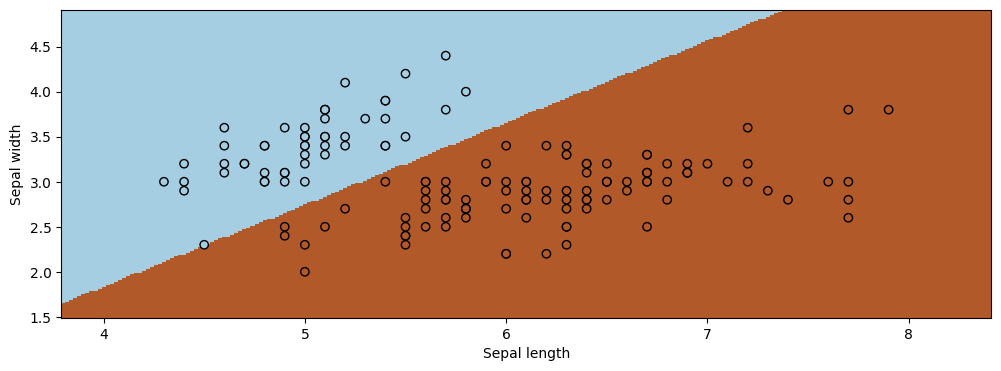

In [29]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = f(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z<0.5] = 0
Z[Z>=0.5] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

This is how we would use the algorithm via `sklearn`.

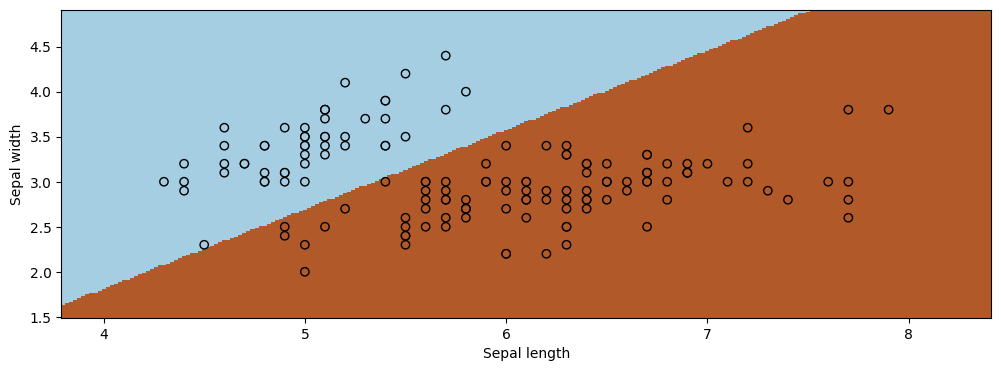

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, fit_intercept=True)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X[:, :2]  # Use array slicing directly since iris_X is already a NumPy array
Y = iris_y2
logreg.fit(X, Y)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()


# Observations About Logistic Regression

* Logistic regression finds a linear decision boundary. This is the set of points for which $P(y=1|x)=P(y=0|x)$, or equivalently:
\begin{align*}
0 = \log\frac{P(y=1|x)}{P(y=0|x)}
= \log \frac{\frac{1}{1+\exp(-\theta^\top x)}}{1-\frac{1}{1+\exp(-\theta^\top x)}}
= \theta^\top x
\end{align*}
The set of $x$ for which $0=\theta^\top x$ is a linear surface.

* Unlike least squares, we don't have a closed form solution (a formula) for the optimal $\theta$. We can nonetheless find it numerically via gradient descent.

# Algorithm: Logistic Regression

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Cross-entropy, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized Bernoulli distribution.

<left><img width=25% src="img/gw_monogram_2c.png"></left>


# Part 5: Multi-Class Classification

Finally, let's look at an extension of logistic regression to an arbitrary number of classes.

# Multi-Class Classification

Logistic regression only applies to binary classification problems. What if we have an arbitrary number of classes $K$?

* The simplest approach that can be used with any machine learning algorithm is the "one vs. all" approach. We train one classifer for each class to distinguish that class from all the others. 

* This works, but is not very elegant.

* Alternatively, we may fit a probabilistic model that outputs multi-class probabilities.

Let's load a fully multiclass version of the Iris dataset.

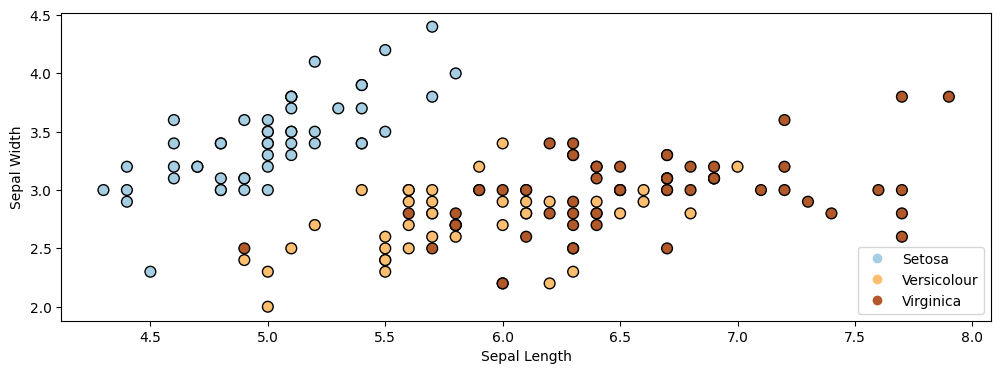

In [33]:
# Plot also the training points
p1 = plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y,  # Use array slicing instead of .iloc
                 edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Create the legend
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

plt.show()


# The Softmax Function

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" the score $z\in\mathbb{R}$ of a class into a probability in $[0,1]$.

The *softmax* function $\vec \sigma : \mathbb{R}^K \to [0,1]^K$ is a multi-class version of $\sigma$ 
* It takes in a $K$-dimensional *vector* of class scores $\vec z\in\mathbb{R}$ 
* It "squeezes" $\vec z$ into a length $K$ *vector* of  probabilities in $[0,1]^K$

The $k$-th component of the output of the softmax function $\vec \sigma$ is defined as
$$ \sigma(\vec z)_k = \frac{\exp(z_k)}{\sum_{l=1}^K \exp(z_l)}. $$

Softmax takes a vector of scores $\vec z$, exponentiates each score $z_k$, and normalizes the exponentiated scores such that they sum to one.

# Recall: Logistic Regression

Logistic regression is a classification algorithm which uses a model $f_\theta$ of the form
$$ f_\theta(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where 
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is the *sigmoid* or *logistic* function. It trains this model using maximum likelihood.

# Softmax Regression: Model Class

Softmax regression is a multi-class classification algorithm which uses a model $f_\theta : \mathcal{X} \to [0,1]^K$ that generalizes logistic regression.

Softmax regression works as follows:
1. Given an input $x$, we compute $K$ scores, one per class. The score 
$$z_k = \theta_k^\top x$$
of class $k$ is a linear function of $x$ and parameters $\theta_k$ for class $k$

2. We "squeeze" the vector of scores $\vec z$ into $[0,1]^K$ using the softmax function $\vec\sigma$ and we output $\vec\sigma(\vec z)$, a vector of $K$ probabilities.

The parameters of this model are $\theta = (\theta_1, \theta_2, ..., \theta_K)$, and the parameter space is $\Theta = \mathbb{R}^{K \times d}$.

The output of the model is a *vector* of class membership probabilities, whose $k$-th component $f_\theta(x)_k$ is
$$ f_\theta(x)_k = \sigma(\theta_k^\top x)_k = \frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}, $$
where each $\theta_l \in \mathbb{R}^d$  is the vector of parameters for class $\ell$ and $\theta = (\theta_1, \theta_2, ..., \theta_K)$.

This model is again over-parametrized: adding a constant $c \in \mathbb{R}$ to every score $\theta_k^\top x$ does not change the output of the model.

As before, we can assume without loss of generality that $z_1=0$ (or equivalently that $\theta_1=0$). This doesn't change the set of functions $\mathcal{X} \to [0,1]^K$ that our model class can represent.

Note again that softmax regression is actually a __classification__ algorithm.

The term *regression* is an unfortunate historical misnomer.

# Softmax Regression: Learning Objective

We again maximize likelihood over a dataset  $\mathcal{D}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n P_\theta (y^{(i)} \mid x^{(i)}) = \prod_{i=1}^n \vec \sigma(\vec z^{(i)})_{y^{(i)}} \\
& = \prod_{i=1}^n \left( \frac{\exp(\theta_{y^{(i)}}^\top x^{(i)})}{\sum_{l=1}^K \exp(\theta_l^\top x^{(i)})} \right). \\
\end{align*}

We optimize this using gradient descent.

Let's now apply softmax regression to the Iris dataset by using the implementation from `sklearn`.

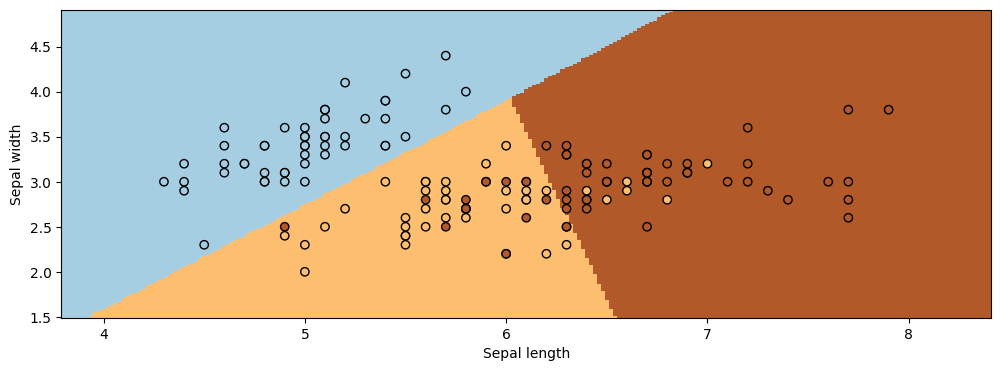

In [34]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, multi_class='multinomial')

# Create an instance of Softmax and fit the data.
logreg.fit(X, iris_y)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Algorithm: Softmax Regression

* __Type__: Supervised learning (multi-class classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Softmax loss, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized categorical distribution.

# Conclusion and Key Ideas

In summary, the key takeaways are:

* We can define classification models by taking a regression model and mapping its output into $[0,1]$ (e.g., via sigmoid or softmax).
* ML models usually have probabilistic interpretations as $P_\theta(y|x)$.
* Any probabilistic model can be trained using maximum likelihood $\max_\theta \sum_{i=1}^n P_\theta(y^{(i)}|x^{(i)})$.